<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/03-momentum.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Momentum and Data

### MGMT 638: Data-Driven Investments: Equity
### Kerry Back, Rice University

### Momentum

- What people have found in equities and other markets (see "Value and Momentum Everywhere" by Asness and other AQR people) is
  - long-term reversals (5 year returns reverse somewhat)
  - medium-term momentum (1 year or 6 month returns continue)
  - short-term reversals (1 month or 1 week returns reverse)
- The conventional definition of momentum in academic work (including the Asness paper) is last year's return excluding the most recent month
  - In other words, the return over the first 11 of the previous 12 months.

### Plan for today

- Look for momentum at the industry level using the Fama-French 49 industries
- Get acquainted with the JGSB SQL database of stock fundamentals and prices 
- Sort stocks on momentum and look at portfolio returns

### Fama-French 49 Industries

- Start by finding the filename to download.

In [1]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

### Get daily returns of all industries

In [2]:
from pandas_datareader import DataReader as pdr
rets = pdr("49_Industry_Portfolios_daily", "famafrench", start=1970)[0]/100
rets.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,0.0305,0.0083,0.0018,0.0043,0.0000,0.0224,0.0220,-0.0004,-0.0025,0.0216,...,-0.0031,0.0368,0.0218,0.0014,0.0149,0.0044,0.0161,0.0384,0.0081,0.0484
1970-01-05,0.0367,0.0071,-0.0068,0.0037,0.0138,0.0028,-0.0047,-0.0026,0.0007,0.0245,...,0.0046,0.0153,0.0133,-0.0044,0.0013,0.0064,0.0165,0.0243,-0.0037,0.0507
1970-01-06,0.0138,-0.0038,0.0032,0.0012,0.0005,-0.0172,-0.0002,-0.0091,-0.0104,-0.0080,...,0.0025,-0.0093,-0.0078,0.0027,-0.0123,-0.0066,-0.0096,-0.0204,-0.0101,-0.0005


### Calculating momentum

- Each day, we want to look back one year and compound the returns, excluding the most recent month.
- Count the days in the past year as 1, 2, ..., 252.
- We want to calculate $(1+r_1)\cdots (1_r_{231})$.
- We can do this as
$$\frac{(1+r_1)\cdots (1+r_{231})(1+r_{232}) \cdots (1+r_{252})}{(1+r_{232})\cdots (1+r_{252})}$$
- In other words,
$$\frac{1 + \text{last year's return}}{1+\text{last month's return}}$$

In [3]:
cumulative_rets = (1+rets).cumprod().shift()
one_year_ret = cumulative_rets.pct_change(252)
one_month_ret = cumulative_rets.pct_change(21)
mom = (1+one_year_ret) / (1+one_month_ret) - 1
mom = mom.dropna()

In [4]:
mom.head(3)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1970-12-31,-0.268268,-0.028023,0.040410,-0.080067,0.292730,-0.179984,-0.168475,-0.281926,-0.096854,-0.125967,...,-0.172807,-0.164845,-0.322069,0.038596,-0.293279,-0.012728,-0.141085,-0.258560,-0.148936,-0.601215
1971-01-04,-0.300242,-0.025224,0.049104,-0.080067,0.253838,-0.176059,-0.169394,-0.274655,-0.099110,-0.134499,...,-0.172313,-0.167971,-0.328692,0.045481,-0.292432,-0.005077,-0.148775,-0.276295,-0.139796,-0.609375
1971-01-05,-0.308732,-0.011133,0.055588,-0.065458,0.268250,-0.154429,-0.160920,-0.260746,-0.078536,-0.113559,...,-0.166286,-0.148822,-0.318543,0.048609,-0.266785,0.012951,-0.134078,-0.246744,-0.118766,-0.606170


### Rank by momentum each day (at close of prior day)

In [5]:
import pandas as pd 

df = pd.concat((mom.stack(), rets.stack()), axis=1).dropna()
df.columns = ["mom", "ret"]
df["rank"] = df.groupby("Date").mom.rank()

In [6]:
df.head()

mom     ret  rank
Date                                    
1970-12-31 Agric -0.268268  0.0078  13.0
           Food  -0.028023  0.0051  35.0
           Soda   0.040410 -0.0069  43.0
           Beer  -0.080067 -0.0034  32.0
           Smoke  0.292730 -0.0135  48.0

### Trading strategy

- Long the 5 industries with highest momentum
- Short the 5 industries with lowest momentum

In [7]:
long = df[df["rank"]>=45].groupby("Date").ret.mean()    # ranks 45, 46, 47, 48, 49
short = df[df["rank"]<=5].groupby("Date").ret.mean()    # ranks 1, 2, 3, 4, 5
long_minus_short = long - short
print(f"long-minus-short annualized mean return is {252*long_minus_short.mean():.2%}")

long-minus-short annualized mean return is 11.15%


### JGSB SQL Database

- Must be on RiceOwls or the [Rice VPN](https://oit.rice.edu/vpn-software).
- Neet to pip install or conda install pymssql and maybe sqlalchemy
- Following is boilerplate to create a connection.  Always the same code for this.
- Can close the connection with conn.close().

In [8]:
from sqlalchemy import create_engine
import pymssql
server = 'fs.rice.edu'
database = 'stocks'
username = 'stocks'
password = '6LAZH1'
string = "mssql+pymssql://" + username + ":" + password + "@" + server + "/" + database 
conn = create_engine(string).connect()

### Database tables

- tickers has one row for each ticker, with general company information
- indicators has one row for each variable in the other tables with definitions
- sf1 has annual and quarterly reports for all NYSE/Nasdaq stocks back to 2000
- sep has daily open, high, low, close and adjusted close for same stocks
- daily has marketcap, pb, pe, ps, ev, evebit, evebitda for same stocks
- sep_weekly is a weekly version of sep
- weekly is a weekly version of daily

### Basic SQL

- select [] from [] join [] on [] where [] order by []
- select * means select all columns
- select top 3 * means select all columns for top 3 rows
- join [] on [] where [] order by [] are all optional
- a table that always exists in information_schema.tables.  It lists the other tables.

In [9]:
pd.read_sql("select * from information_schema.tables", conn)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,stocks,dbo,prices_weekly,BASE TABLE
1,stocks,dbo,sep,BASE TABLE
2,stocks,dbo,sf1,BASE TABLE
3,stocks,dbo,daily,BASE TABLE
4,stocks,dbo,today,BASE TABLE
5,stocks,dbo,ghz,BASE TABLE
6,stocks,dbo,indicators,BASE TABLE
7,stocks,dbo,tickers,BASE TABLE
8,stocks,dbo,weekly,BASE TABLE
9,stocks,dbo,sep_weekly,BASE TABLE


In [10]:
pd.read_sql("select top 3 * from tickers", conn)

,permaticker,siccode,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,isdelisted,ticker,...,famaindustry,sector,industry,scalemarketcap,scalerevenue,relatedtickers,currency,location,secfilings,companysite
0,196290,3826,2023-08-31,2014-09-26,1999-11-18,2023-10-27,1997-06-30,2023-06-30,N,A,...,Measuring and Control Equipment,Healthcare,Diagnostics & Research,5 - Large,5 - Large,None,USD,California; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,https://www.agilent.com
1,124392,3334,2023-10-26,2016-11-01,2016-11-01,2023-10-27,2014-12-31,2023-09-30,N,AA,...,Steel Works Etc,Basic Materials,Aluminum,5 - Large,5 - Large,None,USD,Pennsylvania; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.alcoa.com
2,122827,6022,2019-07-29,2017-09-09,1998-09-25,2003-01-28,1997-09-30,2002-09-30,Y,AAAB,...,Banking,Financial Services,Banks - Regional,2 - Micro,1 - Nano,None,USD,Florida; U.S.A,https://www.sec.gov/cgi-bin/browse-edgar?actio...,None


In [11]:
pd.read_sql("select top 3 * from indicators", conn)

,tbl,indicator,isfilter,isprimarykey,title,description,unittype
0,SF1,revenue,N,N,Revenues,[Income Statement] The amount of Revenue recog...,currency
1,SF1,cor,N,N,Cost of Revenue,[Income Statement] The aggregate cost of goods...,currency
2,SF1,sgna,N,N,Selling General and Administrative Expense,[Income Statement] A component of [OpEx] repre...,currency


In [12]:
pd.read_sql("select top 3 * from sep", conn)

,ticker,date,lastupdated,opn,high,low,cls,volume,closeadj,closeunadj
0,BOOT,2021-09-10,2021-09-10,85.12,86.40,83.340,83.44,257625.000,83.440,83.44
1,BNTC,2021-09-10,2023-07-26,64.94,67.32,64.175,67.15,2597.529,67.150,3.95
2,JBHT,2023-04-05,2023-08-04,170.55,171.82,168.240,170.26,621922.000,169.514,170.26


In [13]:
pd.read_sql("select top 3 * from daily", conn)

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
0,FKLT,2000-10-10,2021-06-14,30.4,-2.7,-2.8,30.9,6.3,-2.7,9.6
1,FFDF,2000-10-10,2022-07-12,40.5,29.3,26.7,12.5,0.8,13.6,3.4
2,FL,2000-10-10,2019-03-28,2161.2,9.9,5.5,1776.2,1.5,15.6,0.4


In [14]:
pd.read_sql("select top 3 * from sf1", conn)

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,ACHV,ARQ,1999-03-31,1999-05-13,1999-03-31,2023-08-15,0.0,17241790.0,None,15975331.0,...,218.0,218.0,218.0,0.00,17241790.0,0.0,0.0,0.0,79086.064,6960444.0
1,ACHV,ARQ,1999-06-30,1999-08-06,1999-06-30,2023-08-15,0.0,14390488.0,None,13292964.0,...,227.0,221.0,221.0,0.00,14390488.0,0.0,0.0,0.0,65190.550,3996699.0
2,ACHV,ARQ,1999-09-30,1999-11-16,1999-09-30,2023-08-15,0.0,16288809.0,None,15314234.0,...,227.0,227.0,230.0,22037.79,16288809.0,0.0,0.0,0.0,71793.872,6078039.0


In [15]:
pd.read_sql("select top 3 * from sep_weekly", conn)

,ticker,date,lastupdated,opn,high,low,volume,closeadj,closeunadj
0,ALX,2002-07-26,2023-08-07,73.0,73.52,68.7,5140.0,27.327,72.80
1,ALX,2002-08-02,2023-08-07,69.1,71.20,69.1,1100.0,26.712,71.16
2,ALX,2002-08-09,2023-08-07,70.0,70.00,67.1,1300.0,25.586,68.16


In [16]:
pd.read_sql("select top 3 * from weekly", conn)

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps
0,CADMQ,2000-04-14,2019-06-13,56.6,-4.2,-4.6,53.1,-126.4,-3.8,15.2
1,CADMQ,2000-04-20,2019-06-13,42.0,-3.1,-3.4,38.5,-91.7,-2.7,11.0
2,CADMQ,2000-04-28,2019-06-13,40.7,-3.0,-3.3,37.2,-88.6,-2.7,10.6


### sep_weekly data

- get ticker, date, closeadj, closeunadj from sep_weekly
- keep only last updated row for each ticker, date (in case multiple updates)

In [17]:
df = pd.read_sql(
    """ 
    select date, ticker, closeadj, closeunadj, lastupdated from sep_weekly 
    where date>='2010-01-01'
    order by ticker, date, lastupdated    
    """,
    conn,
)
df = df.groupby(["ticker", "date", "lastupdated"]).last()
df = df.droplevel("lastupdated")

In [18]:
df.head()

closeadj  closeunadj
ticker date                            
A      2010-01-08    20.187       30.96
       2010-01-15    19.855       30.45
       2010-01-22    19.900       30.52
       2010-01-29    18.707       28.69
       2010-02-05    19.235       29.50

### Calculate weekly returns and momentum

- Compute weekly return as closeadj.pct_change()
- Compute annual returns (through end of prior week)
- Compute monthly returns (through end of prior week)
- Momentum $= (1+\text{annual}) / (1+\text{monthly}) - 1$
- Momentum is through end of prior week so can be used to predict this week's returns
- Also, shift closeunadj by one week because we want to use it to filter out penny stocks.

In [19]:
df["weekly"] = df.groupby("ticker", group_keys=False).closeadj.pct_change()

df["adj_shift"] = df.groupby("ticker", group_keys=False).closeadj.shift()
df["annual"] = df.groupby("ticker", group_keys=False).adj_shift.pct_change(52)
df["monthly"] = df.groupby("ticker", group_keys=False).adj_shift.pct_change(4)

df["mom"] = df.groupby("ticker", group_keys=False).apply(
    lambda d: (1+d.annual)/(1+d.monthly) - 1
)

df["unadj_shift"] = df.groupby("ticker", group_keys=False).closeunadj.shift()
df = df.dropna().copy()

In [20]:
df.head()

closeadj  closeunadj    weekly  adj_shift    annual  \
ticker date                                                              
A      2011-01-14    27.529       42.22  0.008130     27.307  0.352702   
       2011-01-21    28.918       44.35  0.050456     27.529  0.386502   
       2011-01-28    26.721       40.98 -0.075973     28.918  0.453166   
       2011-02-04    26.727       40.99  0.000225     26.721  0.428396   
       2011-02-11    28.318       43.43  0.059528     26.727  0.389498   

                    monthly       mom  unadj_shift  
ticker date                                         
A      2011-01-14  0.127922  0.199287        41.88  
       2011-01-21  0.090949  0.270914        42.22  
       2011-01-28  0.086204  0.337839        44.35  
       2011-02-04 -0.022426  0.461164        40.98  
       2011-02-11 -0.021240  0.419652        40.99

### Filter out penny stocks

- Penny stocks have an undue influence on equally weighted portfolio returns
- We could do value weighted returns instead
- Instead, we'll impose a common filter: price at the time of portfolio formation > $5.00

In [21]:
df = df[df.unadj_shift > 5].copy()
df.head()

closeadj  closeunadj    weekly  adj_shift    annual  \
ticker date                                                              
A      2011-01-14    27.529       42.22  0.008130     27.307  0.352702   
       2011-01-21    28.918       44.35  0.050456     27.529  0.386502   
       2011-01-28    26.721       40.98 -0.075973     28.918  0.453166   
       2011-02-04    26.727       40.99  0.000225     26.721  0.428396   
       2011-02-11    28.318       43.43  0.059528     26.727  0.389498   

                    monthly       mom  unadj_shift  
ticker date                                         
A      2011-01-14  0.127922  0.199287        41.88  
       2011-01-21  0.090949  0.270914        42.22  
       2011-01-28  0.086204  0.337839        44.35  
       2011-02-04 -0.022426  0.461164        40.98  
       2011-02-11 -0.021240  0.419652        40.99

### Form decile portfolios

- We want to go long the top momentum stocks and short the low momentum stocks and see if we earn alpha.
- Let's try top = top 10% and bottom = bottom 10%
- Could try top = top 100 and bottom = bottom 100 instead or other things.

In [31]:
df["decile"] = df.groupby("date", group_keys=False).mom.apply(
    lambda x: pd.qcut(x, 10, labels=range(1, 11))
)
df.head(3)

closeadj  closeunadj    weekly  adj_shift    annual  \
ticker date                                                              
A      2011-01-14    27.529       42.22  0.008130     27.307  0.352702   
       2011-01-21    28.918       44.35  0.050456     27.529  0.386502   
       2011-01-28    26.721       40.98 -0.075973     28.918  0.453166   

                    monthly       mom  unadj_shift decile  
ticker date                                                
A      2011-01-14  0.127922  0.199287        41.88      6  
       2011-01-21  0.090949  0.270914        42.22      7  
       2011-01-28  0.086204  0.337839        44.35      7

### Returns of equally-weighted portfolios

In [32]:
port_rets = df.groupby(["date", "decile"], group_keys=True).weekly.mean()
port_rets = port_rets.unstack()
port_rets.head()

decile,1,2,3,4,5,6,7,8,9,10
date,,,,,,,,,,
2011-01-14,-0.003574,-0.003988,-0.000700,-0.003290,-0.005264,-0.007649,0.000558,-0.004010,-0.000917,0.005246
2011-01-21,0.017434,0.018820,0.015247,0.014496,0.011896,0.012560,0.011547,0.013838,0.016224,0.012599
2011-01-28,-0.024139,-0.017535,-0.014224,-0.009462,-0.012853,-0.011438,-0.015802,-0.014790,-0.022733,-0.038388
2011-02-04,-0.005927,-0.001812,0.001808,0.000847,0.001169,0.002995,0.005542,0.006996,0.012619,0.010899
2011-02-11,0.016875,0.023576,0.018955,0.026951,0.019405,0.023759,0.025541,0.032026,0.030602,0.042071


In [33]:
port_rets.mean()

decile
1     0.000457
2     0.001333
3     0.001823
4     0.002074
5     0.002281
6     0.002367
7     0.002174
8     0.001941
9     0.002400
10    0.002452
dtype: float64

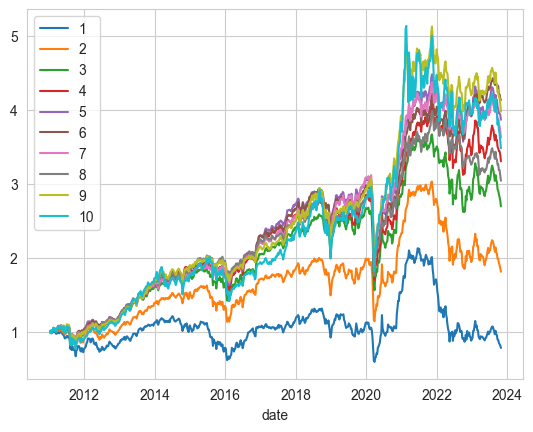

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

(1+port_rets).cumprod().plot()
plt.legend()
plt.show()

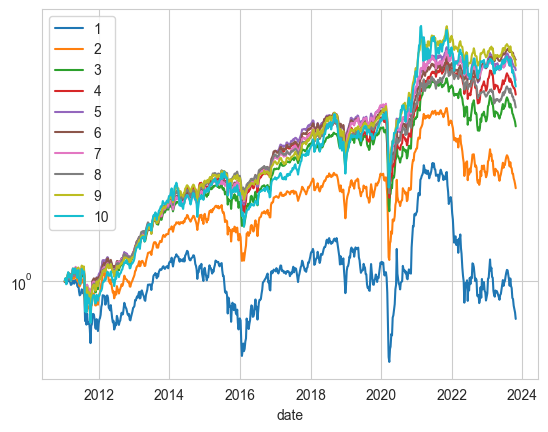

In [42]:
# log scale

(1+port_rets).cumprod().plot(logy=True)
plt.legend()
plt.show()

### Long-minus short returns

In [36]:
long_minus_short = port_rets[10] - port_rets[1]
print(f"annualized long-minus-short return is {52*long_minus_short.mean():.2%}")

annualized long-minus-short return is 10.38%


<AxesSubplot: xlabel='date'>

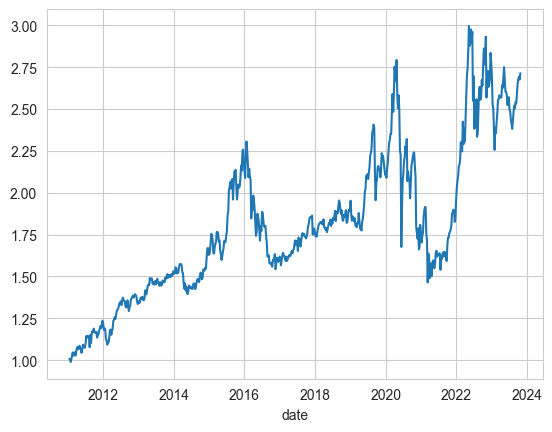

In [43]:
(1+long_minus_short).cumprod().plot()

### Database: industries and other information

- famaindustry and siccode, etc. are in tickers table
- join tables in SQL to get this info in 
- or download tickers table and merge in pandas

### Joining in SQL Example

In [37]:
df2 = pd.read_sql(
    """ 
    select date, a.ticker, closeadj, closeunadj, a.lastupdated,
    famaindustry, siccode
    from sep_weekly as a join tickers as b 
    on a.ticker=b.ticker
    where date>='2020-01-01'
    order by a.ticker, date, a.lastupdated    
    """,
    conn,
)
df2 = df2.groupby(["ticker", "date", "lastupdated"]).last()
df2 = df2.droplevel("lastupdated")

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 972409 entries, ('A', datetime.date(2020, 1, 3)) to ('ZYXI', datetime.date(2023, 10, 27))
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   closeadj      972409 non-null  float64
 1   closeunadj    972409 non-null  float64
 2   famaindustry  970284 non-null  object 
 3   siccode       972409 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 33.4+ MB


### Merging in Pandas Example

In [39]:
df3 = pd.read_sql(
    """ 
    select date, ticker, closeadj, closeunadj, lastupdated
    from sep_weekly
    where date>='2020-01-01'
    order by ticker, date, lastupdated    
    """,
    conn,
)
df3 = df3.groupby(["ticker", "date", "lastupdated"]).last()
df3 = df3.droplevel("lastupdated")

In [40]:
tickers = pd.read_sql("select ticker, siccode, famaindustry from tickers", conn)
df3 = df3.reset_index().merge(tickers, on="ticker")
df3 = df3.set_index(["ticker", "date"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 972409 entries, ('A', datetime.date(2020, 1, 3)) to ('ZYXI', datetime.date(2023, 10, 27))
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   closeadj      972409 non-null  float64
 1   closeunadj    972409 non-null  float64
 2   siccode       972409 non-null  int64  
 3   famaindustry  970284 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 33.6+ MB
